In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (224, 224)

train_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
valid_path = "C:\\Users\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

Found 6185 images belonging to 6 classes.
Found 2649 images belonging to 6 classes.


In [4]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [5]:
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [6]:
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)

Epoch 1/20


97/97 [==============================] - 832s 9s/step - loss: 2.6136 - accuracy: 0.3533 - val_loss: 1.2213 - val_accuracy: 0.5500
Epoch 2/20
97/97 [==============================] - 937s 10s/step - loss: 1.2475 - accuracy: 0.5232 - val_loss: 1.1193 - val_accuracy: 0.5674
Epoch 3/20
97/97 [==============================] - 931s 10s/step - loss: 1.2615 - accuracy: 0.5302 - val_loss: 0.9543 - val_accuracy: 0.6350
Epoch 4/20
97/97 [==============================] - 934s 10s/step - loss: 1.0120 - accuracy: 0.6147 - val_loss: 1.0634 - val_accuracy: 0.5829
Epoch 5/20
97/97 [==============================] - 842s 9s/step - loss: 1.0504 - accuracy: 0.6144 - val_loss: 0.9340 - val_accuracy: 0.6625
Epoch 6/20
97/97 [==============================] - 726s 7s/step - loss: 0.9695 - accuracy: 0.6490 - val_loss: 1.1886 - val_accuracy: 0.5674
Epoch 7/20
97/97 [==============================] - 340s 4s/step - loss: 1.0125 - accuracy: 0.6427 - val_loss: 1.2653 - val_accuracy: 0.6572
Epoch 8/

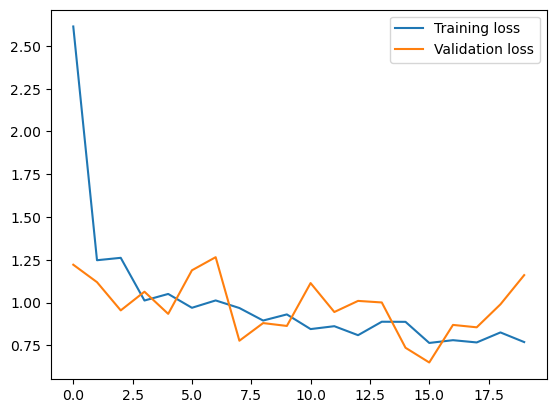

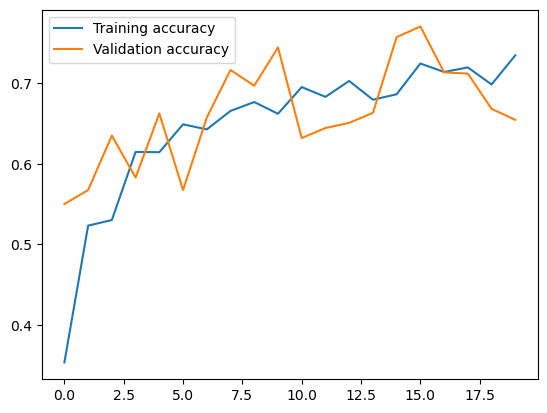

In [10]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()